In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('static/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Identifying What Data we have in our dataset

We want to figure out what data we have in our dataset. We can do this by using the `info()` method.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


For our numerical data we can quickly get some rough information about all the different columns by using the `describe()` method.

In [69]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


We can also plot this data as well, we can use a box and whisker plot to visualize this data.

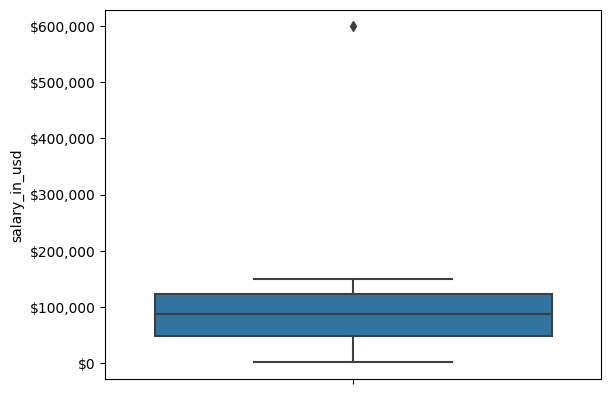

In [116]:
tmp = df.describe()
plot = sns.boxplot(data=tmp, y='salary_in_usd')
plot.yaxis.set_major_formatter('${x:,.0f}')

We see we have one outlier way out at 600k, we can remove this and plot the data again to get a slightly nicer visualization of that salary data

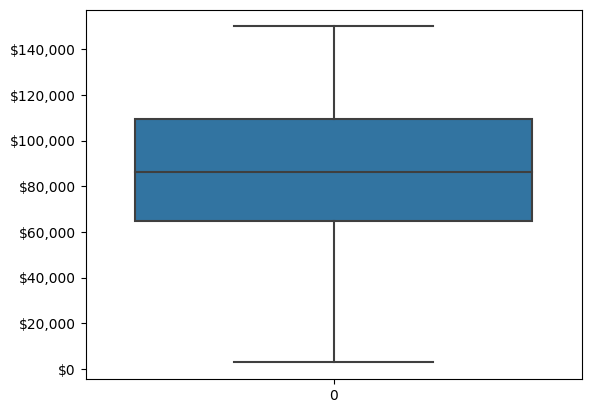

In [108]:
tmp = df.describe()
tmp.drop('count', axis=0, inplace=True)
tmp.drop('max', axis=0, inplace=True)
plot = sns.boxplot(data=tmp['salary_in_usd'])
plot.yaxis.set_major_formatter('${x:,.0f}')

Alone this data isn't that interesting.  We have data that was collected year by year, so We can first group the data by year, and try to see if there was any trend over time

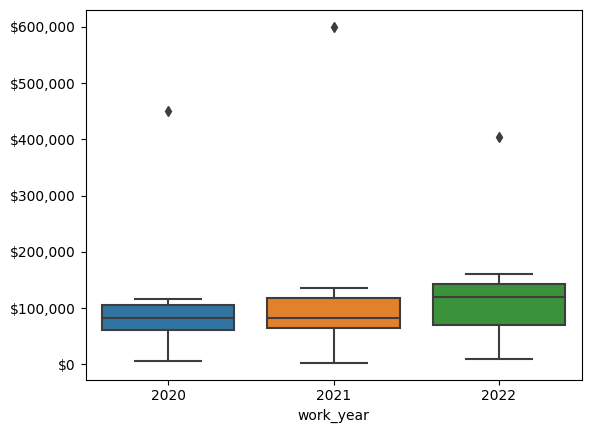

In [111]:
tmp = df[['salary_in_usd', 'work_year']]
tmp = tmp.groupby('work_year').describe()
tmp = tmp['salary_in_usd']
tmp.drop('count', axis=1, inplace=True)
tmp = tmp.transpose()
plot = sns.boxplot(data=tmp)
plot.yaxis.set_major_formatter('${x:,.0f}')

Our graphs are heavily skewed by the max outliers, so let's remove those and plot again

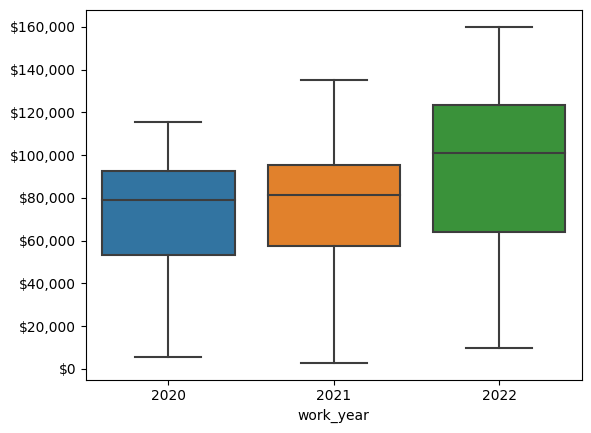

In [112]:
tmp = df[['salary_in_usd', 'work_year']]
tmp = tmp.groupby('work_year').describe()
tmp = tmp['salary_in_usd'] # this line is necessary because it created a multi-index in the last step
tmp.drop('count', axis=1, inplace=True)
tmp.drop('max', axis=1, inplace=True)
tmp = tmp.transpose()
plot = sns.boxplot(data=tmp)
plot.yaxis.set_major_formatter('${x:,.0f}')

We have some numerical Data, but there is also some categorical data

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
